# Sequências

O texto pode ser um tipo de dado:

>"Ada Lovelace foi uma matemática e escritora inglesa. Hoje é reconhecida principalmente por ter escrito o primeiro algoritmo para ser processado por uma máquina, a máquina analítica de Charles Babbage".

Para que transformemos esse texto em dado, precisamos detectar <span style="color: blue">Unidades Atômicas</span>:

- Se escolhermos como <span style="color: blue">Elemento Atômico</span>: <span style="color: purple">palavras</span>
<br>
<br>
<span style="color: white; background-color: purple; border: 1px solid; border-radius: 6px; padding: 4px">Ada</span>
<span style="color: white; background-color: purple; border: 1px solid; border-radius: 6px; padding: 4px">Lovelace</span>
<span style="color: white; background-color: purple; border: 1px solid; border-radius: 6px; padding: 4px">foi</span>
<span style="color: white; background-color: purple; border: 1px solid; border-radius: 6px; padding: 4px">uma</span>
<span style="color: white; background-color: purple; border: 1px solid; border-radius: 6px; padding: 4px">matemática</span>
<span style="color: white; background-color: purple; border: 1px solid; border-radius: 6px; padding: 4px">...</span>
<br>
<br>
- Se escolhermos como <span style="color: blue">Elemento Atômico</span>: <span style="color: red">letras</span>
<br>
<br>
<span style="color: white; background-color: red; border: 1px solid; border-radius: 6px; padding: 4px">A</span>
<span style="color: white; background-color: red; border: 1px solid; border-radius: 6px; padding: 4px">d</span>
<span style="color: white; background-color: red; border: 1px solid; border-radius: 6px; padding: 4px">a</span>
<span style="color: white; background-color: red; border: 1px solid; border-radius: 6px; padding: 4px">L</span>
<span style="color: white; background-color: red; border: 1px solid; border-radius: 6px; padding: 4px">o</span>
<span style="color: white; background-color: red; border: 1px solid; border-radius: 6px; padding: 4px">v</span>
<span style="color: white; background-color: red; border: 1px solid; border-radius: 6px; padding: 4px">e</span>
<span style="color: white; background-color: red; border: 1px solid; border-radius: 6px; padding: 4px">l</span>
<span style="color: white; background-color: red; border: 1px solid; border-radius: 6px; padding: 4px">a</span>
<span style="color: white; background-color: red; border: 1px solid; border-radius: 6px; padding: 4px">c</span>
<span style="color: white; background-color: red; border: 1px solid; border-radius: 6px; padding: 4px">e</span>
<span style="color: white; background-color: red; border: 1px solid; border-radius: 6px; padding: 4px">...</span>
<br>
<br>

A partitura é uma sequência que pode ser interpretada como dado. O fator primordial em determinar como será visto o dado é determinar os intantes de tempo. Sendo assim, em uma partitura um elemento não seria somente uma nota mas o conjunto de notas que ocorrem em um instante de tempo.

Sons no geral podem ser interpretados no domínio do tempo, variando a amplitude. O mesmo som pode ser representado por meio de uma espectograma.

Outra aplicação popular é inferir o valor futuro de uma ação na bolsa de valores.

Em resumo, os eventos possuem relação entre si e a oredem deles é relevante.

# Por que usar rede recorrente?

Se tentassemos usar uma MLP para sequências nos deparariamos com algumas limitações. Teriamos que criar um dicionário de palavras.

O modelo não incorpora relação entre as palavras, já que recebe uma entrada de cada vez e atualiza seus pesos de acordo com a informação individual de cada palavra.

Se ainda assim tentassemos passar sequências ao invés de somente palavras, teríamos uma matriz (o que seria bem maior que o dicionário original). Outro problema associado a MLP é que a entrada e saída precisam ter tamanho fixo. 

A consequência desses fatores é que se torna muito difícil de otimizar.

A tentativa mais promissora ao encarar um problema de sequência com uma MLP seria usar janelas de palavras e tentar classificar somente uma. Essa modelagem é utilizada para modelos <span style="color: purple; font-weight: bold">n-gram</span> em que n-gram é a sequência contínua de n itens dado um texto. Um dos mais populares por exemplo é o trigram, onde apenas duas palavras são utilizadas para inferir a terceira. Essa abordagem era utilizada no autocompletar do ceclular. 

Por processar uma janela fixa, as dependências de longo prazo podem ser perdidas (algumas frases exigem um contexto maior).

Para solucionar esses problemas é criada a arquitetura <span style="color: blue; font-weight: bold">recorrente</span>

<img src="./figures/arq_rnn.png">

Onde a saída também é devolvida como entrada da próxima iteração.

<img src="figures/rnn_diagram.png">

Supondo que separamos por letras. A última classe será a mais representativa e é ela que usaremos para classificar.

### MLP
```python
input_size  = 52 # Letras a-Z
hidden_size = 256
output_size = 18 # Países

hidden_layer = nn.Linear(input_size, hidden_size)
classifier   = nn.Linear(hidden_size, output_size)

inpt = nameToTensor('Camila')
otpt = []

for char in inpt:
    feature = hidden_layer(char)
    classe  = classifier(feature)
    otpt.append(classe)
```

### RNN

```python
input_size  = 52 # Letras a-Z
hidden_size = 256
output_size = 18 # Países

hidden_layer = nn.RNNCell(input_size, hidden_size)
classifier   = nn.Linear(hidden_size, output_size)

inpt = nameToTensor('Camila')
otpt = []

feature_memory = torch.zeros(1, hidden_layer)
for char in inpt:
    feature_memory = hidden_layer(char, feature_memory)
    classe  = classifier(feature_memory)
    otpt.append(classe)
```

# Na prática

In [66]:
import os
import numpy as np
import unicodedata

def le_arquivo(path):
    nomes = open(path, encoding="utf8").read().split('\n')
    nomes = [unicodedata.normalize('NFKD', nome).encode('ascii', 'ignore').decode('utf-8') for nome in nomes]
    categoria = path.split('/')[-1].split('.')[0]
    categorias = np.repeat(categoria, len(nomes))
    
    return nomes, categorias

root = './data/names/'
arquivos = sorted(os.listdir(root))


dados, rotulos = [], []
for arquivo in arquivos:
    nomes, nacionalidades = le_arquivo(os.path.join(root, arquivo))
    dados.append(nomes)
    rotulos.append(nacionalidades)

In [67]:
dados[0][:10]

['Khoury',
 'Nahas',
 'Daher',
 'Gerges',
 'Nazari',
 'Maalouf',
 'Gerges',
 'Naifeh',
 'Guirguis',
 'Baba']

In [68]:
rotulos[0][:10]

array(['Arabic', 'Arabic', 'Arabic', 'Arabic', 'Arabic', 'Arabic',
       'Arabic', 'Arabic', 'Arabic', 'Arabic'], dtype='<U6')

## Convertendo rótulos para tensor

In [69]:
categorias = [arquivo.split('.')[0] for arquivo in arquivos]

categorias

['Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

In [70]:
import torch

In [71]:
torch.tensor([13])

tensor([13])

In [72]:
categorias.index('Portuguese')

13

In [73]:
torch.tensor([categorias.index('Portuguese')])

tensor([13])

In [74]:
def labelToTensor(strg):
    posicao = categorias.index(strg)
    
    return torch.tensor([posicao])

rotulos[13][10], labelToTensor(rotulos[13][10])

('Portuguese', tensor([13]))

## Convertendo nomes para tensor

Representação One-Hot

Como estamos considerando como elemento atômico a letra. Já fizemos o tratamento dos dados para acentos mas, caso contrário, teriamos que incluir letras com acentos também no nosso dicionário. Poderiamos, por exemplo, ter transformado todas as letras para minúsculas, diminuindo ainda mais o dicionário necessário.

Nesse momento é muito importante conhecer bem a base de dados. Alguns nomes chineses possuem hífem, alguns nomes espanhóis possuem espaço. Dado isso, é essencial explorar aa base de dados.

In [75]:
import string

dicionario = string.ascii_letters + " '-"

dicionario

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '-"

In [76]:
len(dicionario)

55

In [77]:
def nameToTensor(name):
    name_tns = torch.zeros(len(name), len(dicionario))
    
    for k, letter in enumerate(name):
        try:
            name_tns[k][dicionario.index(letter)] = 1
        except ValueError:
            None
        
    return name_tns

In [78]:
rotulos[0][10], labelToTensor(rotulos[0][10]), dados[0][10], nameToTensor(dados[0][10])

('Arabic',
 tensor([0]),
 'Sabbagh',
 tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.

In [79]:
rotulos[0][10]

'Arabic'

Um problema que ainda há em nossa base de nomes é o desbalanceamento.

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [81]:
nationality_count = []

for i in range(len(rotulos)):
    print((i, categorias[i], len(rotulos[i])))

    nationality_count.append(len(rotulos[i]))

(0, 'Arabic', 2001)
(1, 'Chinese', 269)
(2, 'Czech', 520)
(3, 'Dutch', 298)
(4, 'English', 3669)
(5, 'French', 278)
(6, 'German', 725)
(7, 'Greek', 204)
(8, 'Irish', 233)
(9, 'Italian', 710)
(10, 'Japanese', 992)
(11, 'Korean', 95)
(12, 'Polish', 140)
(13, 'Portuguese', 75)
(14, 'Russian', 9385)
(15, 'Scottish', 101)
(16, 'Spanish', 299)
(17, 'Vietnamese', 74)


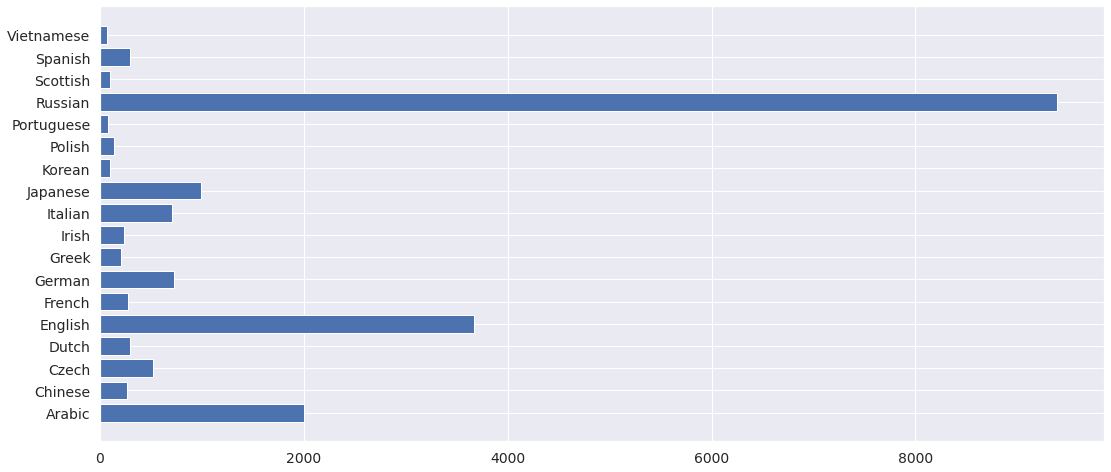

In [82]:
plt.figure(figsize=(18, 8))

plt.barh(y=categorias, width=nationality_count)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

Uma possível solução para tal problema é, sempre que formos iterar uma época, balancear as amostras.

In [83]:
def amostrar(num_amostras):
    amostra, rotulo_amostra = [], []
    
    for categ in categorias:
        num_nomes = len(dados[categorias.index(categ)])
        
        indices = np.random.choice(range(num_nomes), size=num_amostras)
        amostra.extend([dado for idx, dado in enumerate(dados[categorias.index(categ)]) if idx in indices])
        rotulo_amostra.extend([rotulo for idx, rotulo in enumerate(rotulos[categorias.index(categ)]) if idx in indices])
        
    amostra = [nameToTensor(name) for name in amostra]
    rotulo_amostra = [labelToTensor(rotulo) for rotulo in rotulo_amostra]
    
    return amostra, rotulo_amostra

In [84]:
dados_tns, rotulos_tns = amostrar(50)

In [85]:
dados_tns[0], rotulos_tns[0]

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

# Modelo Recorrente

O nosso modelo irá consistir em:
- Camada de entrada de dimensão: **55** (alfabeto minúsculo + maiúsculo + caracteres especiais)
- Camada oculta de dimensão: **256** (hiperparâmetro)
- Camada de saída de dimensão: **18** (número de classes)
- Batch Size: **1** (Para não lidarmos com sequências de tamanho variável)

In [86]:
import torch
from torch import nn

In [87]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cpu')

In [88]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.recurrent   = nn.RNNCell(input_size, hidden_size)
        
        self.output      = nn.Linear(hidden_size, output_size)
        self.activation  = nn.LogSoftmax()
        
    def forward(self, X):
        # inicialização da memória interna / feature / hidden state
        h = torch.zeros(1, self.hidden_size).to(device) # B x F
        
        for letra in X:
            h =  self.recurrent(letra.unsqueeze(0), h) # 1 x 55 -> B x N
            
        output = self.activation(self.output(h))
        
        return output

In [89]:
modelo = RNN(len(dicionario), 256, len(categorias)).to(device)

modelo

RNN(
  (recurrent): RNNCell(55, 256)
  (output): Linear(in_features=256, out_features=18, bias=True)
  (activation): LogSoftmax(dim=None)
)

### Loss e Otimizador

In [90]:
args = {
    'lr': 5e-5,
    'weight_decay': 1e-7,
    'device': device
}

In [91]:
criterion = nn.NLLLoss().to(device) # Semelhante a CrossEntropy só que usamos essa por ter usado LogSoftmax na rede

In [92]:
optimizer = torch.optim.Adam(modelo.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

### Forward

In [93]:
def forward(X, Y, etapa, epoca):
    
    acuracia   = 0.
    loss_epoca = []
    
    for dado, rotulo in zip(X, Y):
        dado   = dado.to(device)
        rotulo = rotulo.to(device)
        
        saida = modelo(dado) # B x C -> 1 x 18
        loss  = criterion(saida, rotulo)
        loss_epoca.append(loss.detach().numpy())
        
        _, pred = torch.max(saida, axis=-1)
        acuracia += 1 if pred[0].item() == rotulo[0].item() else 0
        
        if etapa == 'treino':
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
    loss_epoca = np.array(loss_epoca)
    acuracia   = acuracia / float(len(loss_epoca))
    
    print('\n', '*'*15 + etapa + '*'*15)
    print('Epoca: {:}, Loss: {:.2f} +/- {:.2f}, Acc: {:.2f}'.format(epoca, loss_epoca.mean(), loss_epoca.std(), acuracia*100))
    
    return loss_epoca.mean(), acuracia

In [94]:
loss_treino, loss_teste = [], []
acc_treino, acc_teste = [], []

dados_teste_tns, rotulos_teste_tns = amostrar(50)

for epoca in range(200):
    dados_tns, rotulo_tns = amostrar(50)
    
    loss, acc = forward(dados_tns, rotulos_tns, 'treino', epoca)
    
    loss_treino.append(loss)
    acc_treino.append(acc)
    
    
    loss, acc = forward(dados_teste_tns, rotulos_teste_tns, 'teste', epoca)
    
    loss_teste.append(loss)
    acc_teste.append(acc)
    
    print('\n')

/tmp/ipykernel_47862/3009800570.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.activation(self.output(h))



 ***************treino***************
Epoca: 0, Loss: 2.81 +/- 0.42, Acc: 6.84

 ***************teste***************
Epoca: 0, Loss: 3.05 +/- 0.58, Acc: 6.72



 ***************treino***************
Epoca: 1, Loss: 2.86 +/- 0.49, Acc: 7.42

 ***************teste***************
Epoca: 1, Loss: 2.97 +/- 0.47, Acc: 6.85



 ***************treino***************
Epoca: 2, Loss: 2.80 +/- 0.51, Acc: 6.79

 ***************teste***************
Epoca: 2, Loss: 3.02 +/- 0.65, Acc: 7.33



 ***************treino***************
Epoca: 3, Loss: 2.84 +/- 0.47, Acc: 6.16

 ***************teste***************
Epoca: 3, Loss: 2.94 +/- 0.48, Acc: 8.31



 ***************treino***************
Epoca: 4, Loss: 2.84 +/- 0.39, Acc: 7.55

 ***************teste***************
Epoca: 4, Loss: 2.93 +/- 0.47, Acc: 10.51



 ***************treino***************
Epoca: 5, Loss: 2.87 +/- 0.22, Acc: 8.05

 ***************teste***************
Epoca: 5, Loss: 2.84 +/- 0.23, Acc: 15.28



 ***************treino*********

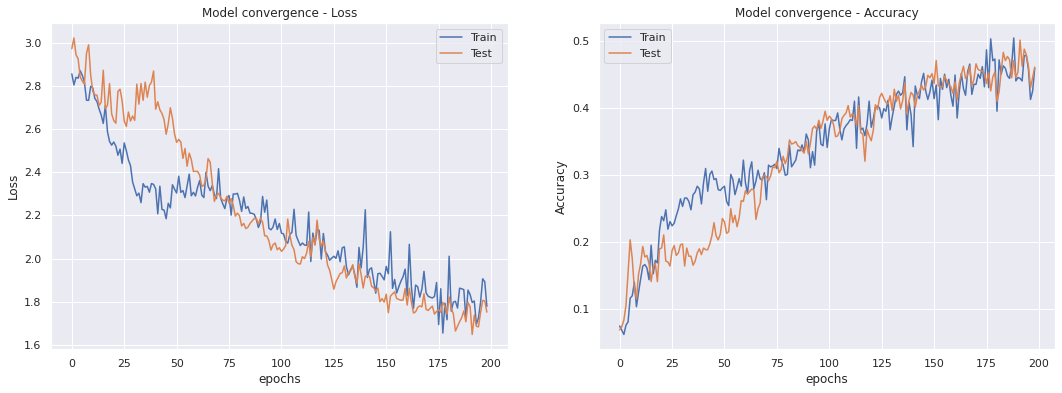

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(loss_treino[1:], label="Train")
ax[0].plot(loss_teste[1:], label="Test")
ax[0].set_title("Model convergence - Loss")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(acc_treino[1:], label="Train")
ax[1].plot(acc_teste[1:], label="Test")
ax[1].set_title("Model convergence - Accuracy")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()

In [96]:
def predict(nome):
  modelo.eval()

  tns = torch.zeros(len(nome), len(dicionario))

  for k, letra in enumerate(nome):
    idx = dicionario.find(letra)
    tns[k, idx] = 1

  tns = tns.to(args['device'])

  saida = modelo(tns)
  topv, topi = saida.data.topk(3, 1, True)

  print(nome)
  for value, index in zip(topv[0], topi[0]):
    print(f"{value:.2f} - {categorias[index]}")
  print("\n")

In [97]:
predict("Markel")
predict("Hirobumi")
predict("Suarez")

Markel
-1.50 - Scottish
-1.61 - German
-2.09 - Irish


Hirobumi
-0.29 - Japanese
-2.71 - Italian
-3.34 - Russian


Suarez
-1.63 - Spanish
-1.81 - German
-2.21 - Dutch




/tmp/ipykernel_47862/3009800570.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.activation(self.output(h))


## Variações na arquitetura

<img src="./figures/arqs_rnn.jpg">

### One to one
- FeedForward comum
- Dados não sequenciais

### One to many
- Entrada não sequencial (imagem por exemplo)
- Saída é uma sequência (Image Captioning)

### Many to one
- Entrada é uma sequência
- Classificação de sentimentos

### Many to many
- Não sincronizada
- Entrada é um sinal de voz
- Saída é um conjunto de palavras

### Many to many
- Sincronizada
- Reconhecimento de entidade

## Vanishing gradient
O gradiente que desaparece (ou explode)

<img src="./figures/vanishing_grad.png">

É um problema para qualquer rede neural muito profunda. No caso das redes convolucionais, teríamos como solução as redes residuais. Já para as rede recorrentes temos que admitir que a profundidade da rede está na dimensão do tempo.

### Gates
São os elementos principais das células avançadas recorrentes e solucionam o problema do vanishing gradient.

É um portão que decide o quanto de informação passará adiante ("Nem sempre o passado maiss recente precisa ocupar tanto espaço na memória")

<img src="./figures/gates.png">

#### LSTM

<img src="./figures/lstm.png">

#### GRU

<img src="./figures/gru.png">

In [98]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.recurrent   = nn.GRU(input_size, hidden_size, batch_first=False)
        
        self.output      = nn.Linear(hidden_size, output_size)
        self.activation  = nn.LogSoftmax()
        
    def forward(self, X):
        # inicialização da memória interna / feature / hidden state
        h = torch.zeros(1, 1, self.hidden_size).to(args['device']) # L X B x F
        
        X = X.unsqueeze(1) # S x B x F
        output, h = self.recurrent(X)
            
        output = self.activation(self.output(output[-1]))
        
        return output

In [99]:
modelo = RNN(len(dicionario), 256, len(categorias)).to(device)

modelo

RNN(
  (recurrent): GRU(55, 256)
  (output): Linear(in_features=256, out_features=18, bias=True)
  (activation): LogSoftmax(dim=None)
)

In [100]:
optimizer = torch.optim.Adam(modelo.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

```python
torch.nn.GRU(
  input_size,   # Num entradas
  hidden_size,  # Num de neurônios
  batch_first,  # Dimensão do batch é a primeira
  num_layers,   # Num de camadas
  bidirectional # Se é bidirecional (dobra o número de neurônios por camada)
)
```

# Análise de Sentimentos

In [109]:
from torchdata.datapipes.iter import HttpReader
URL = "https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv"
ag_news_train = HttpReader([URL]).parse_csv().map(lambda t: (int(t[0]), " ".join(t[1:])))
agn_batches = ag_news_train.batch(2).map(lambda batch: {'labels': [sample[0] for sample in batch],\
                                      'text': [sample[1].split() for sample in batch]})
batch = next(iter(agn_batches))
assert batch['text'][0][0:8] == ['Wall', 'St.', 'Bears', 'Claw', 'Back', 'Into', 'the', 'Black']

/media/matheus/ARQUIVOS/Alura/DS/Deep Learning/Deep_Learning_com_PyTorch_RNN/venv/lib/python3.10/site-packages/torch/utils/data/datapipes/utils/common.py:22: UserWarning: Lambda function is not supported for pickle, please use regular python function or functools.partial instead.
  warnings.warn(


In [112]:
import torch
import pandas as pd

In [113]:
imdb = pd.read_csv("./data/imdb/imdb_processed.csv")

imdb.head()

,processed,label
0,One reviewer mentioned watching Oz episode hoo...,1
1,A wonderful little production . The filming te...,1
2,I thought wonderful way spend time hot summer ...,1
3,Basically family little boy Jake think zombie ...,0
4,Petter Mattei Love Time Money visually stunnin...,1


In [125]:
imdb['processed'] = imdb['processed'].apply(lambda text: text.split())

imdb.head()

,processed,label
0,"[One, reviewer, mentioned, watching, Oz, episo...",1
1,"[A, wonderful, little, production, ., The, fil...",1
2,"[I, thought, wonderful, way, spend, time, hot,...",1
3,"[Basically, family, little, boy, Jake, think, ...",0
4,"[Petter, Mattei, Love, Time, Money, visually, ...",1


In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(imdb['processed'], imdb['label'],test_size=0.2)